In [1]:
%matplotlib inline
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

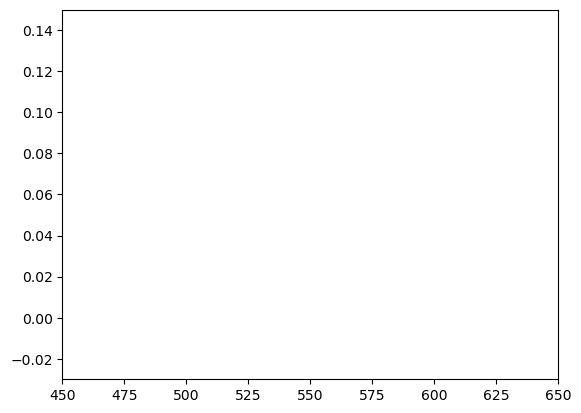

In [2]:
fig, ax = plt.subplots()

ax.set_xlim(( 450., 650.))
ax.set_ylim((- 0.03, 0.15))

line, = ax.plot([], [], lw=2)

nframes = 500

def init():
    line.set_data([], [])
    return (line,)

## Forward Time, Centered Space (FTCS)

In [3]:
def advective_step(q=None, dx=None, dt=None, v=None):
    qnew = np.zeros(len(q))
    qnew[1:-1] = q[1:-1] - dt * v * (q[2:] - q[0:-2]) / (2. * dx)
    return(qnew)

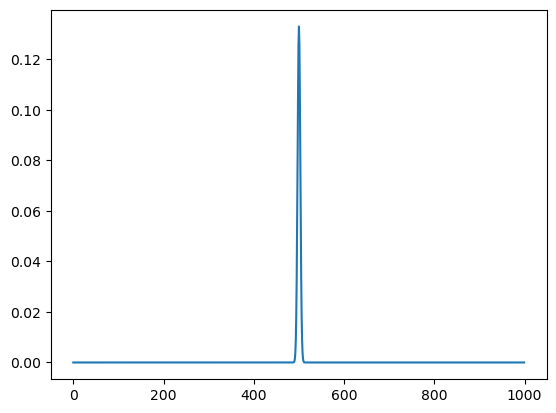

In [4]:
dx = 1.
v = 1.
dt = 0.1 # note that we will definitely want dt < (dx / v)
n = 1000
sig = 3.
start = np.float64(n // 2) 
x = np.arange(n)
qstart = np.exp(- 0.5 * (x - start)**2 / sig**2) / np.sqrt(2. * np.pi) / sig
plt.plot(x, qstart)

In [5]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_step(q=q[i, :], dx=dx, dt=dt, v=v)

In [6]:
def frame(i):
    line.set_data(x, q[i, :])
    return (line,)

In [7]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

## Lax Method

In [10]:
def advective_lax_step(q=None, dx=None, dt=None, v=None):
    qnew = np.zeros(len(q))
    qnew[1:-1] = 0.5 * (q[0:-2] + q[2:]) - dt * v * (q[2:] - q[0:-2]) / (2. * dx)
    return(qnew)

In [11]:
nstep = 300
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v, v=v)

In [12]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [13]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 1.1, v=v)

In [14]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [15]:
nstep = 300
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 0.9, v=v)

In [16]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [17]:
sig = 30.
qstart = np.exp(- 0.5 * (x - start)**2 / sig**2) / np.sqrt(2. * np.pi) / sig
ax.set_xlim(( 450., 750.))
ax.set_ylim((- 0.03, 0.05))

(-0.03, 0.05)

In [18]:
nstep = 100
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 0.9, v=v)

In [19]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [20]:
wavelength = 20. 
qstart = np.cos(2. * np.pi * x  / wavelength)
ax.set_xlim(( 450., 750.))
ax.set_ylim((- 1.05, 1.05))

(-1.05, 1.05)

In [21]:
nstep = 200
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 0.5, v=v)

In [22]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

In [23]:
wavelength = 200. 
qstart = np.cos(2. * np.pi * x  / wavelength)
ax.set_xlim(( 450., 750.))
ax.set_ylim((- 1.05, 1.05))

(-1.05, 1.05)

In [24]:
nstep = 200
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_lax_step(q=q[i, :], dx=dx, dt=dx / v * 0.5, v=v)

In [25]:
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

## Leapfrog Method

In [26]:
def advective_leapfrog_step(q=None, qold=None, dx=None, dt=None, v=None):
    qnew = np.zeros(len(q))
    qnew[1:-1] = qold[1:-1] - dt * v * (q[2:] - q[0:-2]) / (dx)
    return(qnew)

In [27]:
sig = 10.
qold = np.exp(- 0.5 * (x - start)**2 / sig**2) / np.sqrt(2. * np.pi) / sig
qstart = advective_lax_step(q=qold, dx=dx, dt=dx / v * 0.5, v=v)

In [28]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = advective_leapfrog_step(q=q[i, :], qold=qold, dx=dx, dt=dx / v * 0.5, v=v)
    qold = q[i, :]

In [29]:
ax.set_ylim((- 0.01, 0.05))
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

## Diffusion Equation

In [264]:
def diffusion_ftcs_step(q=None, dt=None, dx=None, D=None):
    alpha = D * dt / dx**2
    qnew = np.zeros(q.shape)
    qnew[1:-1] = q[1:-1] + alpha * (q[0:-2] - 2. * q[1:-1] + q[2:])
    return(qnew)

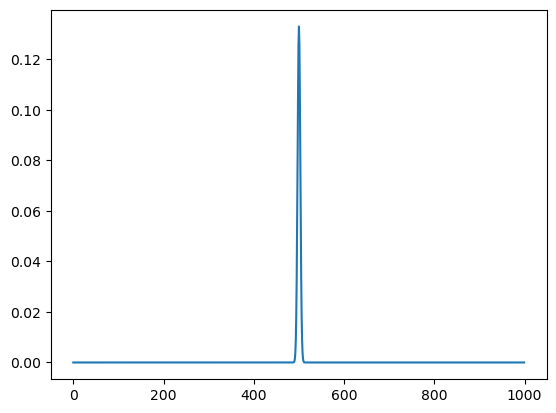

In [265]:
dx = 1.
D = 1.
n = 1000
sig = 3.
start = np.float64(n // 2) 
x = np.arange(n)
qstart = np.exp(- 0.5 * (x - start)**2 / sig**2) / np.sqrt(2. * np.pi) / sig
plt.plot(x, qstart)

In [266]:
nstep = 1000
q = np.zeros((nstep, n))
q[0, :] = qstart
for i in np.arange(nstep - 1):
    q[i + 1, :] = diffusion_ftcs_step(q=q[i, :], dx=dx, dt=dx**2 / D * 0.5, D=D)

In [267]:
ax.set_ylim((- 0.01, 0.15))
ax.set_xlim((200., 800.))
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nstep, interval=40,
                               blit=True)

HTML(anim.to_html5_video())

# Schrodinger

In [297]:
def schrodinger_a(dt=None, dx=None, V=None):
    alpha = - (dt / dx**2 * 1.j) * np.ones(len(V) - 1, dtype=np.complex64)
    beta = (((2. * dt) / dx**2 + dt * V) * 1.j) + 1.
    A = scipy.sparse.diags([alpha, beta, alpha], offsets=[-1, 0, 1])
    A = A.toarray()
    return(A)

def schrodinger_implicit_matrix(dt=None, dx=None, V=None):
    A = schrodinger_a(dt=dt, dx=dx, V=V)
    Ainv = np.linalg.inv(A)
    return(Ainv)

In [298]:
N = 1001
x = np.arange(N, dtype=np.float64) - np.float64(N // 2)
V = np.zeros(N, dtype=np.complex64) + 0.00001 * x**2 + 1.

Text(0, 0.5, 'V')

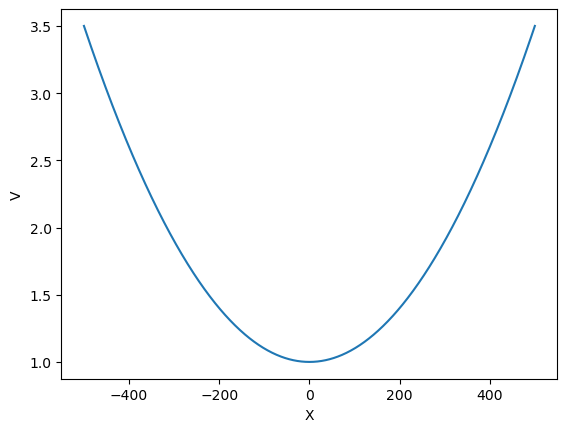

In [299]:
plt.plot(x, V.real)
plt.xlabel('X')
plt.ylabel('V')

0.9999999997049444


Text(0, 0.5, '$\\phi(t=0)$')

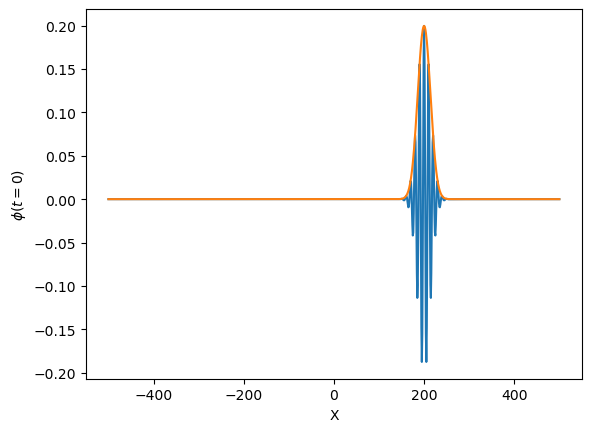

In [289]:
sigma = 10.
period = 10.
phi0 = (np.complex64(np.sqrt(np.exp(- (x - 200.)**2 / (2. * sigma**2)) / np.sqrt(2. * np.pi) / sigma)) *
        np.exp((1.j) * 2. * np.pi * x / period))
plt.plot(x, phi0.real)
plt.plot(x, np.abs(phi0))
print((np.abs(phi0)**2).sum())
plt.xlabel('X')
plt.ylabel(r'$\phi(t=0)$')

In [300]:
phi = phi0.copy()
Ainv = schrodinger_implicit_matrix(dt=0.25, dx=1., V=V)

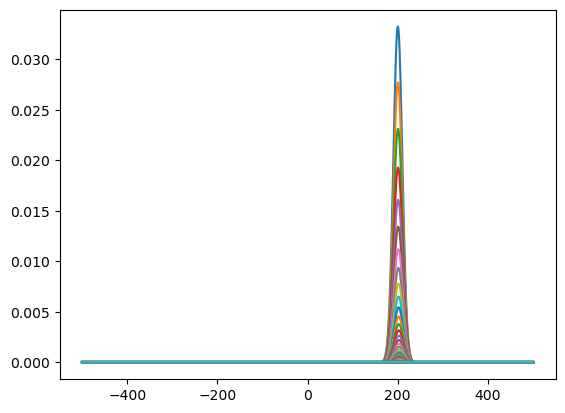

In [301]:
for i in np.arange(100):
    phi = Ainv.dot(phi)
    plt.plot(x, np.abs(phi)**2)

In [302]:
print((np.abs(phi)**2).sum())

2.866232733170216e-08


In [303]:
def schrodinger_cayley_matrix(dt=None, dx=None, V=None):
    #Af = schrodinger_a(dt=(- 0.5) * dt, dx=dx, V=V)
    Ab = schrodinger_a(dt=0.5 * dt, dx=dx, V=V)
    c = 2. * np.linalg.inv(Ab) - np.identity(Ab.shape[0], dtype=np.complex64)
    return(c)

In [304]:
cayley = schrodinger_cayley_matrix(dt=0.25, dx=1., V=V)

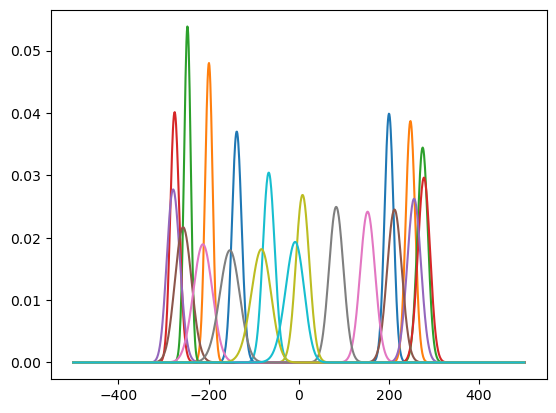

In [305]:
phi = phi0.copy()
for i in np.arange(4000):
    phi = cayley.dot(phi)
    if((i % 200) == 0):
        plt.plot(x, np.abs(phi)**2)

In [306]:
print((np.abs(phi)**2).sum())

0.9999999997048424
